# Sage Exercise and Practices

This notebook follows the book [Abstract Algebra: Theory and Applications](http://abstract.ups.edu/sage-aata.html). 

It is a collection of exercises and practices that I have done while reading the book. Hope this notebook can be useful for those who are learning abstract algebra using SageMath.

In [1]:
from sage import *
from sage.all import *
from sage.groups.matrix_gps.finitely_generated import *
from IPython.display import Markdown, display

## Chapter 2: Integers

In [2]:
# 2.3.1
print(factor(123456792))

# 2.3.2
gcd(84, 52)

2^3 * 3 * 59 * 87187


4

In [3]:
# 2.5.2 the Ackermann function
def ack(x, y):
    if x == 0: return y+1
    elif y == 0: return ack(x-1, 1)
    else:
        return ack(x-1, ack(x, y-1))

print(ack(3, 1))

# NOTE: this recursion can be really deep.

13


In [4]:
# 2.7
a = 1234567
b = 123
print(a.quo_rem(b))
print(a.divides(b))

print(gcd(1235688, 12444))
print(xgcd(1235688, 12444))

d, r, s = xgcd(1235688, 12444)  # gcd(a, b) = d = r * a + s * b
print(r * 1235688 + s * 12444)

(10037, 16)
False
12
(12, -10, 993)
12


In [5]:
# Prime, factors, and random prime.

print(is_prime(430400923))

print(factor(4923))

print(random_prime(1000, proof=True))

print(prime_range(100, 110))

a = 43000
for prime_factor, exponent in a.factor():
    print(f"{prime_factor}^{exponent}")

True
3^2 * 547
739
[101, 103, 107, 109]
2^3
5^3
43^1


In [6]:
# Exercise
a = random_prime(10^8, proof=True)
b = random_prime(10^8, proof=True)

print(f"a = {a}, b = {b}")

assert a.is_prime() and b.is_prime()

print(f"gcd(a, b) = {gcd(a, b)}")

d, r, s = xgcd(a, b)

print(f"gcd(a, b) = {d} = {r} * {a} + {s} * {b}")

a = 53691541, b = 15569537
gcd(a, b) = 1
gcd(a, b) = 1 = -1825226 * 53691541 + 6294291 * 15569537


In [7]:
c = 4598037234
c.factor()

2 * 3^2 * 7 * 36492359

In [8]:
print(ZZ(7).divides(c))
print(ZZ(11).divides(c))

True
False


## Chapter 3: Groups

### Integer Ring and Basic Operations

In [9]:
Z8 = Integers(8) # Create the ring of integers modulo 8.
print(type(Z8))  # Print type information.
print(Z8.list()) # Print the elements of the ring.

a = Z8.an_element()  # Get a random element of the ring.
print(a)
print(a.parent())
print(Z8.addition_table(names='elements')) # Operation table.

<class 'sage.rings.finite_rings.integer_mod_ring.IntegerModRing_generic_with_category'>
[0, 1, 2, 3, 4, 5, 6, 7]
0
Ring of integers modulo 8
+  0 1 2 3 4 5 6 7
 +----------------
0| 0 1 2 3 4 5 6 7
1| 1 2 3 4 5 6 7 0
2| 2 3 4 5 6 7 0 1
3| 3 4 5 6 7 0 1 2
4| 4 5 6 7 0 1 2 3
5| 5 6 7 0 1 2 3 4
6| 6 7 0 1 2 3 4 5
7| 7 0 1 2 3 4 5 6



### Symmetric Group

In [10]:
triangle = SymmetricGroup(3)
rho2 = triangle([3, 1, 2]) # Bottom row of the 'double-row' notation.
print(rho2) # Cycle notation.
print(triangle.domain()) # The underlying set.
print(rho2(triangle.domain().list())) # Apply the permutation to the domain.

mu1 = triangle([2, 3, 1])
print(mu1 * rho2) # Composition of permutations.

print(triangle.cayley_table(names='elements')) # Cayley table.

print(triangle.cayley_table(names=["id", "u1", "u3", "r1", "r2", "u2"])) # Cayley table with custom names.

(1,3,2)
{1, 2, 3}
[3, 1, 2]
()
      *       ()   (2,3)   (1,2) (1,2,3) (1,3,2)   (1,3)
       +------------------------------------------------
     ()|      ()   (2,3)   (1,2) (1,2,3) (1,3,2)   (1,3)
  (2,3)|   (2,3)      () (1,2,3)   (1,2)   (1,3) (1,3,2)
  (1,2)|   (1,2) (1,3,2)      ()   (1,3)   (2,3) (1,2,3)
(1,2,3)| (1,2,3)   (1,3)   (2,3) (1,3,2)      ()   (1,2)
(1,3,2)| (1,3,2)   (1,2)   (1,3)      () (1,2,3)   (2,3)
  (1,3)|   (1,3) (1,2,3) (1,3,2)   (2,3)   (1,2)      ()

 *  id u1 u3 r1 r2 u2
  +------------------
id| id u1 u3 r1 r2 u2
u1| u1 id r1 u3 u2 r2
u3| u3 r2 id u2 u1 r1
r1| r1 u2 u1 r2 id u3
r2| r2 u3 u2 id r1 u1
u2| u2 r1 r2 u1 u3 id



### Quarternions

In [11]:
Q = QuaternionGroup()
print(q_cayley := Q.cayley_table(names='letters')) # Cayley table.

identity = Q.identity()  # Obviously 'a' is the identity.

print([x.order() for x in q_cayley.column_keys()])  # Orders of the elements.

# We found that 'c' is the only element of order 2, 'c' should be -1.
minus_one = q_cayley.column_keys()[2]

print(minus_one * minus_one == identity) # Verify



*  a b c d e f g h
 +----------------
a| a b c d e f g h
b| b c d a h e f g
c| c d a b g h e f
d| d a b c f g h e
e| e f g h c d a b
f| f g h e b c d a
g| g h e f a b c d
h| h e f g d a b c

[1, 4, 2, 4, 4, 4, 4, 4]
True


### The Colplex Numbers

In [12]:
H = [CC(1), CC(-1)]
print(CC.multiplication_table(elements=H, names=['1', '-1'])) # Multiplication table.

H = [CC(1), CC(-1), CC(I), CC(-I)]
print(CC.multiplication_table(elements=H, names=['1', '-1', 'i', '-i'])) # Multiplication table.

 *   1 -1
  +------
 1|  1 -1
-1| -1  1

 *   1 -1  i -i
  +------------
 1|  1 -1  i -i
-1| -1  1 -i  i
 i|  i -i -1  1
-i| -i  i  1 -1



### Fancy Operation Table

In [13]:
from sage.matrix.operation_table import OperationTable

A4 = AlternatingGroup(4)
print(otab := OperationTable(A4, operation=lambda x, y: x * y, names='letters'))

.  a b c d e f g h i j k l
 +------------------------
a| a b c d e f g h i j k l
b| b c a f d e h i g l j k
c| c a b e f d i g h k l j
d| d g j a h k b e l c f i
e| e i k c g l a f j b d h
f| f h l b i j c d k a e g
g| g j d k a h e l b i c f
h| h l f j b i d k c g a e
i| i k e l c g f j a h b d
j| j d g h k a l b e f i c
k| k e i g l c j a f d h b
l| l f h i j b k c d e g a



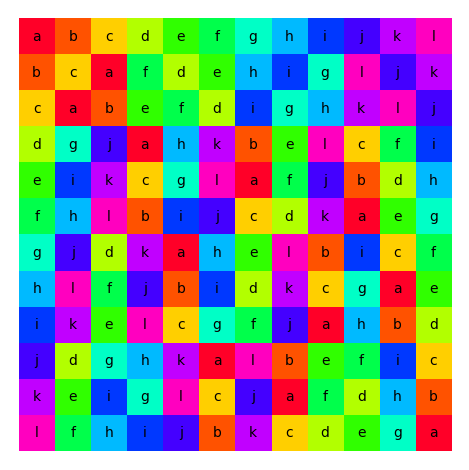

In [14]:
# Color table.
# This is really cool.
otab.color_table()

### Exercises

In [15]:
C8 = CyclicPermutationGroup(8)
D4 = DihedralGroup(4)

print(f'{C8.order()} == {D4.order()}', C8.order() == D4.order())

print(C8.cayley_table())
print(D4.cayley_table())

print(D4.is_abelian())

8 == 8 True
*  a b c d e f g h
 +----------------
a| a b c d e f g h
b| b c d e f g h a
c| c d e f g h a b
d| d e f g h a b c
e| e f g h a b c d
f| f g h a b c d e
g| g h a b c d e f
h| h a b c d e f g

*  a b c d e f g h
 +----------------
a| a b c d e f g h
b| b a d c f e h g
c| c g a e d h b f
d| d h b f c g a e
e| e f g h a b c d
f| f e h g b a d c
g| g c e a h d f b
h| h d f b g c e a

False


In [16]:
# Find the subgroup with order 4 in 'C'.
H1 = [x for x in C8.subgroups() if x.order() == 4][0]

# Find the three subgroups with order 4 in 'D'.
H2 = [x for x in D4.subgroups() if x.order() == 4][0]
H3 = [x for x in D4.subgroups() if x.order() == 4][1]
H4 = [x for x in D4.subgroups() if x.order() == 4][2]

print(H1.cayley_table())
print(H2.cayley_table())
print(H3.cayley_table())
print(H4.cayley_table())

# H1 and H3 have the same Cayley table.

*  a b c d
 +--------
a| a b c d
b| b c d a
c| c d a b
d| d a b c

*  a b c d
 +--------
a| a b c d
b| b a d c
c| c d a b
d| d c b a

*  a b c d
 +--------
a| a b c d
b| b c d a
c| c d a b
d| d a b c

*  a b c d
 +--------
a| a b c d
b| b a d c
c| c d a b
d| d c b a



## Chapter 4: Cyclic Groups

### Matrix Groups

In [17]:
display(Markdown("Actually its $GL_2(\mathbb{Q})$, but I can't figure out the way to deal with subgroups of $GL_2(\mathbb{R})$. It just doesn't works."))

# Exercise 4.5.4
# Use `print` to display the elements of matrix group is just... ugly.
display(MatrixGroup(Matrix(QQ, 2, [0, 1, -1, 0])).list())  # a
display(MatrixGroup(Matrix(QQ, 2, [0, 1/3, 3, 0])).list()) # b
display(MatrixGroup(Matrix(QQ, 2, [1, -1, 1, 0])).list())  # c
print(MatrixGroup(Matrix(QQ, 2, [1, -1, 0, 1])).order())   # d, Infinite order.
print(MatrixGroup(Matrix(QQ, 2, [1, -1, -1, 0])).order())  # e, Infinite order.
# f, which is a rotation matrix with 30 degrees, has an order of 12.

Actually its $GL_2(\mathbb{Q})$, but I can't figure out the way to deal with subgroups of $GL_2(\mathbb{R})$. It just doesn't works.

(
[1 0]  [-1  0]  [ 0 -1]  [ 0  1]
[0 1], [ 0 -1], [ 1  0], [-1  0]
)

(
[1 0]  [  0 1/3]
[0 1], [  3   0]
)

(
[1 0]  [ 0  1]  [-1  1]  [-1  0]  [ 0 -1]  [ 1 -1]
[0 1], [-1  1], [-1  0], [ 0 -1], [ 1 -1], [ 1  0]
)

+Infinity
+Infinity


### Additive Cylic Groups

In [18]:
G = AdditiveAbelianGroup([100])     # Z/100Z.
print(G.order())                    # Order of G.
print(a := G.gen(0))                # A generator of G.
print(a * 123)                      # 123 * a.
print(G([3]).order())               # Order of 3 in Z/100Z.
print(H := G.submodule([G([20])]))  # Subgroup generated by 20.
print(H.list())                     # List the elements of H.


100
(1)
(23)
100
Additive abelian group isomorphic to Z/5
[(0), (20), (40), (60), (80)]


### Multiplicative Cyclic Groups
This will define a cyclic group in a different way.
$$G=\{a^k:k\in\mathbb{Z}\}$$

In [19]:
G.<a> = AbelianGroup([15])  # type: ignore <- For surpressing the warning.
print(G.order())            # Order of G.
print(G.list())             # List the elements of G.
print(b := a^3)             # b = a^3.
print(b.order())            # Order of b.
print(H := G.subgroup([b])) # Subgroup generated by b.
print(H.list())             # List the elements of H.
print(G.subgroups())        # This is an advntage of defining a cyclic group with this way: Subgroups!

15
(1, a, a^2, a^3, a^4, a^5, a^6, a^7, a^8, a^9, a^10, a^11, a^12, a^13, a^14)
a^3
5
Multiplicative Abelian subgroup isomorphic to C5 generated by {a^3}
(1, f, f^2, f^3, f^4)
[Multiplicative Abelian subgroup isomorphic to C3 x C5 generated by {a}, Multiplicative Abelian subgroup isomorphic to C5 generated by {a^3}, Multiplicative Abelian subgroup isomorphic to C3 generated by {a^5}, Trivial Abelian subgroup]


### Cyclic Permutation Groups
This will define a cyclic group in an even different way: as a group of permutations.

In [20]:
G = CyclicPermutationGroup(12)  # Cyclic group of order 12 as a permutation group.
print(a := G.gen(0))            # A generator of G.
print(b := a^4)                 # b = a^4.
print(b.order())                # Order of b.
print(H := G.subgroup([b]))     # Subgroup generated by b.
print(H.list())                 # List the elements of H.

(1,2,3,4,5,6,7,8,9,10,11,12)
(1,5,9)(2,6,10)(3,7,11)(4,8,12)
3
Subgroup generated by [(1,5,9)(2,6,10)(3,7,11)(4,8,12)] of (Cyclic group of order 12 as a permutation group)
[(), (1,5,9)(2,6,10)(3,7,11)(4,8,12), (1,9,5)(2,10,6)(3,11,7)(4,12,8)]


### Cayley Tables

*  a b c d e f g h i j k l
 +------------------------
a| a b c d e f g h i j k l
b| b c d e f g h i j k l a
c| c d e f g h i j k l a b
d| d e f g h i j k l a b c
e| e f g h i j k l a b c d
f| f g h i j k l a b c d e
g| g h i j k l a b c d e f
h| h i j k l a b c d e f g
i| i j k l a b c d e f g h
j| j k l a b c d e f g h i
k| k l a b c d e f g h i j
l| l a b c d e f g h i j k



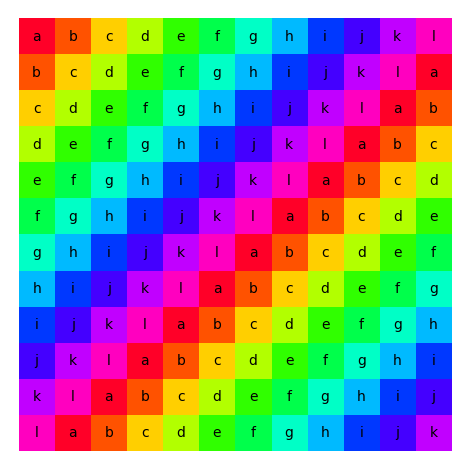

In [21]:
G.<a> = AbelianGroup([12])              # type: ignore Z/12Z.
print(G.cayley_table())                 # Cayley table of G.
display(G.cayley_table().color_table()) # Remember the fancy color table?

### Cycle Groups: Root of Unity

In [22]:
G = CyclotomicField(6)              # The field of 6th roots of unity.
print(w := G.gen(0))                # A generator of G.
print(CDF(w))                       # Convert to complex number.
print((CDF(w).arg() * 180) / N(pi)) # Argument in degrees.

zeta6
0.5000000000000001 + 0.8660254037844386*I
59.99999999999999


### Exercises

In [23]:
# Exercise 1
print(Z40 := Integers(40))                              # Z/40Z
print(Z40.list())
print(Z40.unit_group_order())                           # |U(40)|
print(Z40.list_of_elements_of_multiplicative_group())   # U(40)
print(Z40.multiplicative_subgroups())                   # Subgroups of U(40)

# Exercise 2
a = Z40(7)                                              # let a = 7
print([a^i for i in range(16)])                         # The powers of a in U(40).
print(len({a^i for i in range(16)}))                    # The order of a in U(40).
print(Z40.unit_group())

# Exercise 3
print(Z49 := Integers(49))                              # Z/49Z
print(Z49.multiplicative_group_is_cyclic())
print(Z49_units := Z49.list_of_elements_of_multiplicative_group())
print(len(Z49_units))
print({a: len({a^i for i in range(len(Z49_units))}) for a in Z49_units})
print(Z49.unit_group())

# Exercise 4
print(Z35 := Integers(35))   
print(Z35_units := Z35.list_of_elements_of_multiplicative_group())
print({a: len({a^i for i in range(len(Z35_units))}) for a in Z35_units})
print(Z35.unit_group())


Ring of integers modulo 40
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
16
[1, 3, 7, 9, 11, 13, 17, 19, 21, 23, 27, 29, 31, 33, 37, 39]
((31, 21, 17), (31, 21, 9), (31, 13), (21, 7), (11, 7), (31, 21), (31, 29), (39, 21), (39, 29), (31, 17), (31, 9), (7,), (31,), (39,), (11, 17), (11, 9), (27,), (11,), (19,), (21, 17), (21, 9), (37,), (21,), (29,), (17,), (9,), ())
[1, 7, 9, 23, 1, 7, 9, 23, 1, 7, 9, 23, 1, 7, 9, 23]
4
Multiplicative Abelian group isomorphic to C2 x C2 x C4
Ring of integers modulo 49
True
[1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48]
42
{1: 1, 2: 42, 3: 42, 4: 42, 5: 42, 6: 42, 8: 42, 9: 42, 10: 42, 11: 42, 12: 42, 13: 42, 15: 42, 16: 42, 17: 42, 18: 42, 19: 42, 20: 42, 22: 42, 23: 42, 24: 42, 25: 42, 26: 42, 27: 42, 29: 42, 30: 42, 31: 42, 32: 42, 33:

# Chapter 5: Permutation Groups

### Basic Definitions and Notations

In [24]:
Sym6 = SymmetricGroup(6)                # S6
print(Sym6.order())                     # |S6| should be 6! = 720
print(perm := Sym6((1, 4, 2, 5, 3, 6))) # Define a permutation.
print(Sym6.domain())                    # The underlying set.
print(perm(list(Sym6.domain())))        # Apply the permutation to the domain, aka. the 2nd row of `double-row` notation.

720
(1,4,2,5,3,6)
{1, 2, 3, 4, 5, 6}
[4, 5, 6, 2, 3, 1]


In [25]:
# The composition of permutations is evaulated from right to left.
# But in Python, it is evaluated from left to right.
Sym6(((3, 6))) * Sym6(((5, 3))) * Sym6((2, 5)) * Sym6((4, 2)) * Sym6((1, 4))

(1,4,2,5,3,6)

### Exercises

In [26]:
print(Sym10 := SymmetricGroup(10)) # S10
print(a := Sym10("(5, 7, 2, 9, 3, 1, 8)")) 
print(b := Sym10("(1, 3)(4, 5)"))
print(c := Sym10([(1, 2), (3, 4)]))
print(d := Sym10([(1, 3), (2, 5, 8), (4, 6, 7, 9, 10)]))

# Exercise 2-a: Composition of permutations.
print(a^3)
print(c * b)
print(a * (d.inverse()) * b)

#

# Exercise 2-c: Even / Odd permutations.
print([x.sign() for x in [a, b, c, d]])

# Exercise 2-d: Subgroups analysis.
print(H := Sym10.subgroup([a]))
print(K := Sym10.subgroup([d]))
print(H.list())
print(K.list())
print(K_subgroup := K.subgroup(         # Construct the subgroup with order 10.
    [
        Sym10([(1, 3), (4, 7, 10, 6, 9)])
    ]))
print(K_subgroup.order())
print(L := Sym10.subgroup([b, c]))      # Subgroup generated by multiple generators.
print(L.list())


Symmetric group of order 10! as a permutation group
(1,8,5,7,2,9,3)
(1,3)(4,5)
(1,2)(3,4)
(1,3)(2,5,8)(4,6,7,9,10)
(1,7,3,5,9,8,2)
(1,2,3,5,4)
(1,4,10,9,3)(2,7,8)(5,6)
[1, 1, 1, -1]
Subgroup generated by [(1,8,5,7,2,9,3)] of (Symmetric group of order 10! as a permutation group)
Subgroup generated by [(1,3)(2,5,8)(4,6,7,9,10)] of (Symmetric group of order 10! as a permutation group)
[(), (1,8,5,7,2,9,3), (1,5,2,3,8,7,9), (1,7,3,5,9,8,2), (1,2,8,9,5,3,7), (1,9,7,8,3,2,5), (1,3,9,2,7,5,8)]
[(), (1,3)(2,5,8)(4,6,7,9,10), (2,8,5)(4,7,10,6,9), (1,3)(4,9,6,10,7), (2,5,8)(4,10,9,7,6), (1,3)(2,8,5), (4,6,7,9,10), (1,3)(2,5,8)(4,7,10,6,9), (2,8,5)(4,9,6,10,7), (1,3)(4,10,9,7,6), (2,5,8), (1,3)(2,8,5)(4,6,7,9,10), (4,7,10,6,9), (1,3)(2,5,8)(4,9,6,10,7), (2,8,5)(4,10,9,7,6), (1,3), (2,5,8)(4,6,7,9,10), (1,3)(2,8,5)(4,7,10,6,9), (4,9,6,10,7), (1,3)(2,5,8)(4,10,9,7,6), (2,8,5), (1,3)(4,6,7,9,10), (2,5,8)(4,7,10,6,9), (1,3)(2,8,5)(4,9,6,10,7), (4,10,9,7,6), (1,3)(2,5,8), (2,8,5)(4,6,7,9,10), (1,3)(4,